In [6]:
import pandas as pd
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv("BreastCancer.csv")

In [8]:
df.head(4)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300


In [9]:
df.isna()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
df.isna().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [11]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [12]:
concavity_mean=df["concavity_mean"].mean()

In [13]:
concavity_mean

0.08879931581722322

In [14]:
df['concavity_mean']=df['concavity_mean'].replace([0],concavity_mean)

In [15]:
mean_glucose = round(df['concavity_worst'].mean(),2)
df['concavity_worst']=df['concavity_worst'].replace([0],mean_glucose)

<AxesSubplot:xlabel='area_mean'>

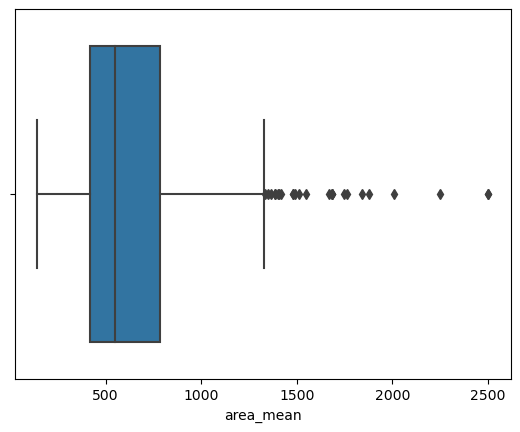

In [16]:
sns.boxplot(x=df['area_mean'])

In [17]:
q1=np.percentile(df['area_mean'],25,interpolation='midpoint')
q3=np.percentile(df['area_mean'],75,interpolation='midpoint')
IQR=q3-q1
print("old shape: ",df.shape)
#upper bound
upper = np.where(df['area_mean']>=(q3+1.5*IQR))
#Lower bound
lower = np.where(df['area_mean'] <=(q3-1.5*IQR))
#OUTLIERS
df.drop(upper[0],inplace=True)
df.drop(lower[0],inplace=True)
print("new shape: ",df.shape)

old shape:  (569, 32)
new shape:  (531, 32)


C:\Users\SHYNI\AppData\Local\Temp\ipykernel_16132\2059868314.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  q1=np.percentile(df['area_mean'],25,interpolation='midpoint')
C:\Users\SHYNI\AppData\Local\Temp\ipykernel_16132\2059868314.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  q3=np.percentile(df['area_mean'],75,interpolation='midpoint')


In [18]:
q1=df.radius_mean.quantile(0.25)
q3=df.radius_mean.quantile(0.75)
print(q1,q3)
iqr=q3-q1


11.725000000000001 15.355


In [19]:
ll=q1-1.5*iqr
ul=q3-1.5*iqr
print(ul,ll)

9.910000000000002 6.280000000000003


<AxesSubplot:xlabel='radius_mean'>

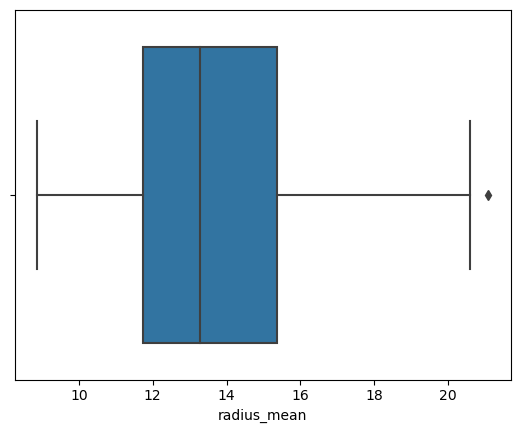

In [20]:
sns.boxplot(x=df['radius_mean'])

In [21]:
df[(df.radius_mean<ll)|(df.radius_mean>ul)]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.14710,...,25.38,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.07017,...,24.99,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.12790,...,23.57,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.10520,...,14.91,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.10430,...,22.54,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,925311,B,11.20,29.37,70.67,386.0,0.07449,0.03558,0.088799,0.00000,...,11.92,38.30,75.19,439.6,0.09267,0.05494,0.2700,0.0000,0.1566,0.05905
562,925622,M,15.22,30.62,103.40,716.9,0.10480,0.20870,0.255000,0.09429,...,17.52,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.2356,0.4089,0.14090
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.144000,0.09791,...,23.69,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.092510,0.05302,...,18.98,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [22]:
non_outliers=df[(df.radius_mean>ll)&(df.radius_mean<ul)]
non_outliers

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
21,8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.029560,0.020760,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
63,859196,B,9.173,13.86,59.20,260.9,0.07721,0.08751,0.059880,0.021800,...,10.010,19.23,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490
66,859464,B,9.465,21.01,60.11,269.4,0.10440,0.07773,0.021720,0.015040,...,10.410,31.56,67.03,330.7,0.15480,0.16640,0.09412,0.06517,0.2878,0.09211
68,859471,B,9.029,17.33,58.79,250.5,0.10660,0.14130,0.313000,0.043750,...,10.310,22.65,65.50,324.7,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750
71,859711,B,8.888,14.64,58.79,244.0,0.09783,0.15310,0.086060,0.028720,...,9.733,15.67,62.56,284.4,0.12070,0.24360,0.14340,0.04786,0.2254,0.10840
97,862261,B,9.787,19.94,62.11,294.5,0.10240,0.05301,0.006829,0.007937,...,10.920,26.29,68.81,366.1,0.13160,0.09473,0.02049,0.02381,0.1934,0.08988
103,862980,B,9.876,19.40,63.95,298.3,0.10050,0.09697,0.061540,0.030290,...,10.760,26.83,72.22,361.2,0.15590,0.23020,0.26440,0.09749,0.2622,0.08490
110,864033,B,9.777,16.99,62.50,290.2,0.10370,0.08404,0.043340,0.017780,...,11.050,21.47,71.68,367.0,0.14670,0.17650,0.13000,0.05334,0.2533,0.08468
116,864726,B,8.950,15.76,58.74,245.2,0.09462,0.12430,0.092630,0.023080,...,9.414,17.07,63.34,270.0,0.11790,0.18790,0.15440,0.03846,0.1652,0.07722
140,868999,B,9.738,11.97,61.24,288.5,0.09250,0.04102,0.088799,0.000000,...,10.620,14.10,66.53,342.9,0.12340,0.07204,0.27000,0.00000,0.3105,0.08151


<AxesSubplot:xlabel='radius_mean'>

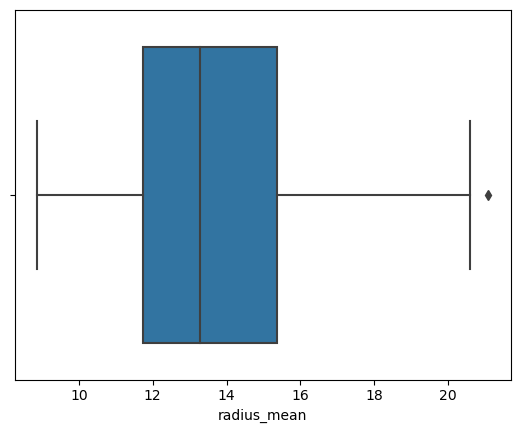

In [23]:
sns.boxplot(x=df['radius_mean'])

<AxesSubplot:xlabel='radius_mean'>

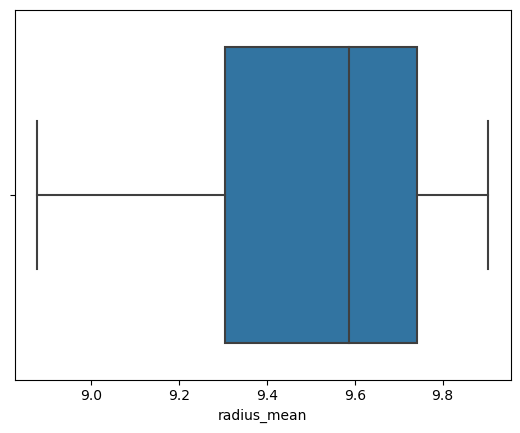

In [24]:
sns.boxplot(x=non_outliers['radius_mean'])

In [25]:
df1=[3000,2000,5000,5000,9000]
mean=sum(df1)/len(df1)

In [26]:
print(mean)

4800.0


In [27]:
variance=sum((x-mean)**2 for x in df1)/len(df1)

In [28]:
print(variance)

5760000.0


In [29]:
sd=variance**0.5
print(sd)

2400.0


In [31]:
y=df['diagnosis']
x=df.drop('diagnosis',axis=1)

In [32]:
#standardisation
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [33]:
x_train.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,4.240000e+02,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,...,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000
mean,2.464793e+07,13.867965,19.095825,90.144646,619.163679,0.096539,0.102351,0.084424,0.046230,0.180838,...,15.860262,25.467052,104.321439,816.576415,0.132007,0.250514,0.266880,0.111541,0.290284,0.084031
std,9.966515e+07,2.888745,4.309758,19.863765,268.836989,0.013808,0.051140,0.071719,0.033693,0.027475,...,3.951298,6.157275,27.314300,426.089967,0.022424,0.157845,0.204689,0.060735,0.064185,0.018501
min,8.670000e+03,8.888000,9.710000,56.360000,244.000000,0.064290,0.026500,0.000974,0.000000,0.106000,...,9.414000,12.020000,60.900000,270.000000,0.084090,0.043270,0.003581,0.000000,0.156500,0.055040
25%,8.688598e+05,11.747500,16.010000,75.532500,425.400000,0.086765,0.063755,0.029700,0.020645,0.161900,...,13.045000,20.910000,84.147500,515.875000,0.117075,0.146825,0.113925,0.064730,0.249825,0.071412
50%,9.060010e+05,13.290000,18.785000,85.980000,546.200000,0.096180,0.089040,0.059100,0.032770,0.179000,...,14.880000,25.225000,97.260000,677.600000,0.131200,0.206900,0.225450,0.097660,0.280950,0.079900
75%,8.910560e+06,15.347500,21.572500,101.800000,726.175000,0.104825,0.130325,0.119500,0.066903,0.195400,...,18.002500,29.875000,120.600000,988.825000,0.144600,0.327375,0.374675,0.154475,0.318475,0.092082
max,9.113205e+08,21.090000,39.280000,143.700000,1326.000000,0.163400,0.345400,0.410800,0.160400,0.304000,...,27.320000,49.540000,186.800000,2398.000000,0.222600,1.058000,1.252000,0.290300,0.663800,0.207500


In [34]:
type(x_train)

pandas.core.frame.DataFrame

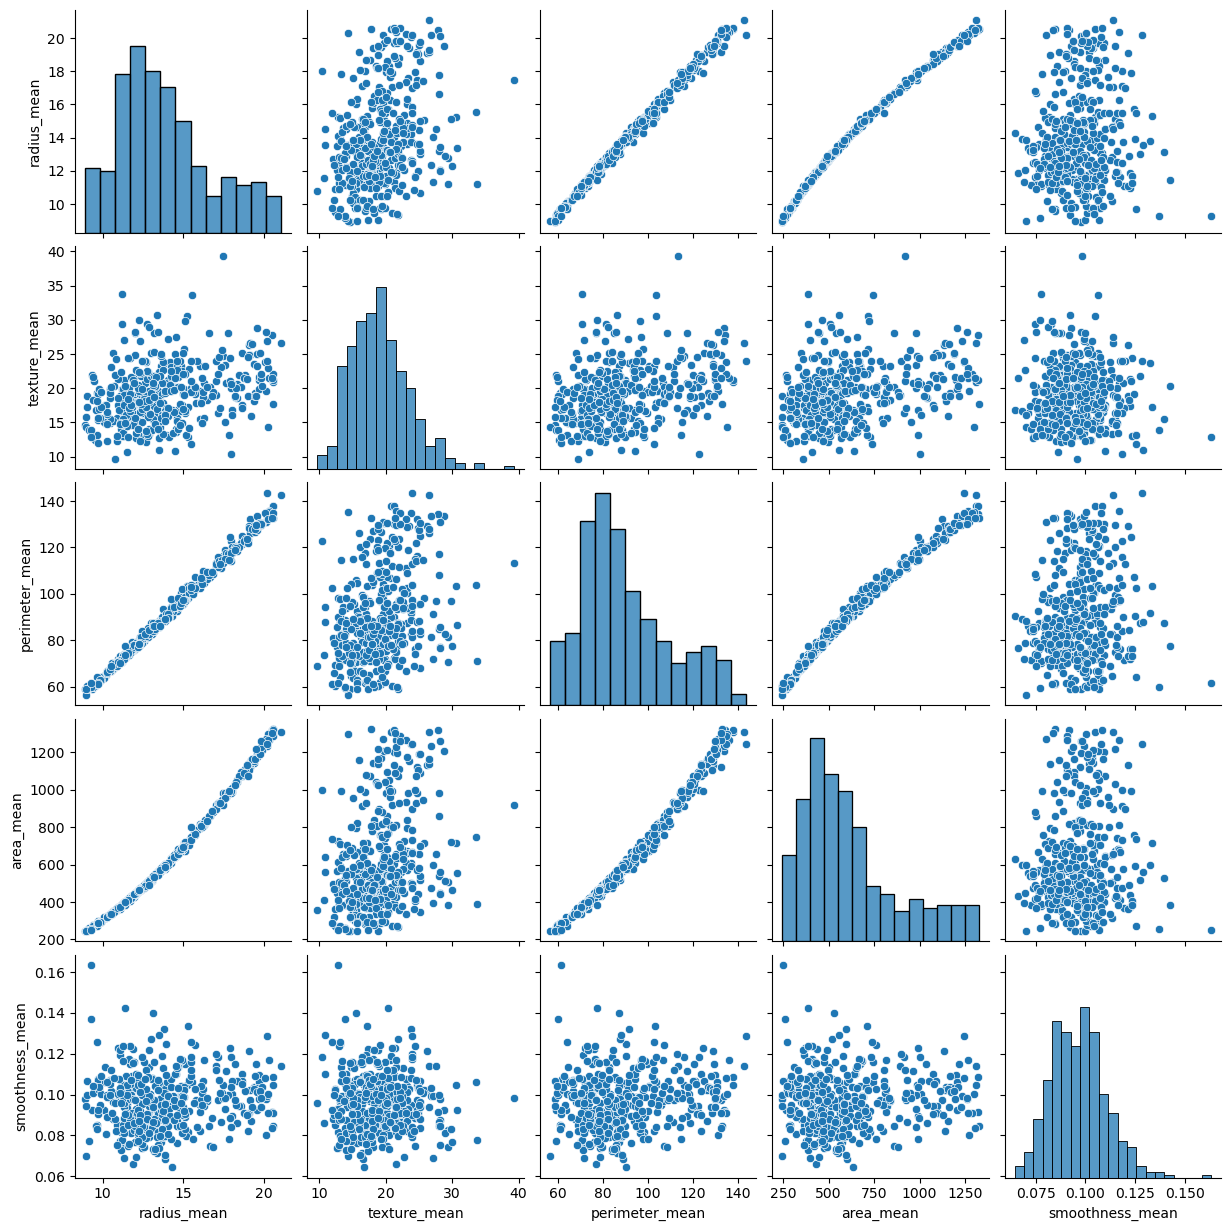

In [35]:
sns.pairplot(x_train,vars=['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean'])

In [37]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)

In [38]:
type(x_train)

numpy.ndarray

In [39]:
x_train=pd.DataFrame(x_train)

In [40]:
type(x_train)

pandas.core.frame.DataFrame

In [41]:
x_train.describe().round(2)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
count,424.00,424.00,424.00,424.00,424.00,424.00,424.00,424.00,424.00,424.00,...,424.00,424.00,424.00,424.00,424.00,424.00,424.00,424.00,424.00,424.00
mean,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,...,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.25,-1.73,-2.18,-1.70,-1.40,-2.34,-1.48,-1.16,-1.37,-2.73,...,-1.63,-2.19,-1.59,-1.28,-2.14,-1.31,-1.29,-1.84,-2.09,-1.57
25%,-0.24,-0.73,-0.72,-0.74,-0.72,-0.71,-0.76,-0.76,-0.76,-0.69,...,-0.71,-0.74,-0.74,-0.71,-0.67,-0.66,-0.75,-0.77,-0.63,-0.68
50%,-0.24,-0.20,-0.07,-0.21,-0.27,-0.03,-0.26,-0.35,-0.40,-0.07,...,-0.25,-0.04,-0.26,-0.33,-0.04,-0.28,-0.20,-0.23,-0.15,-0.22
75%,-0.16,0.51,0.58,0.59,0.40,0.60,0.55,0.49,0.61,0.53,...,0.54,0.72,0.60,0.40,0.56,0.49,0.53,0.71,0.44,0.44
max,8.91,2.50,4.69,2.70,2.63,4.85,4.76,4.56,3.39,4.49,...,2.90,3.91,3.02,3.72,4.04,5.12,4.82,2.95,5.83,6.68


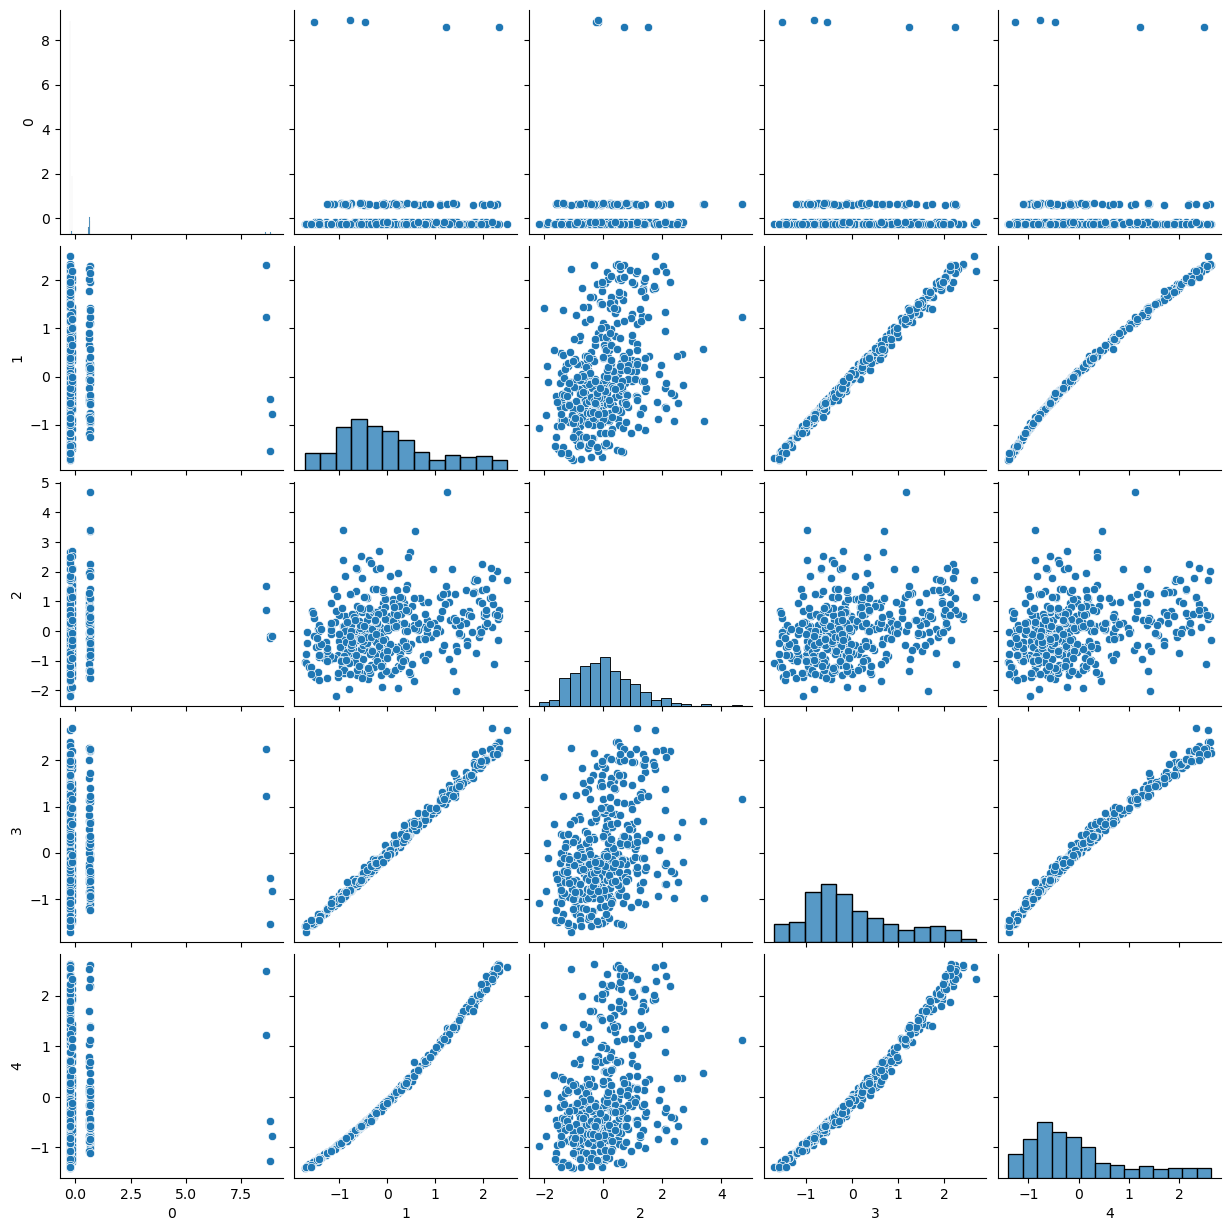

In [42]:
sns.pairplot(x_train,vars=[0,1,2,3,4])

In [46]:
from sklearn.preprocessing import MinMaxScaler
trans=MinMaxScaler()
x_test=trans.fit_transform(x_test)

In [47]:
type(x_test)

numpy.ndarray

In [48]:
x_test1=pd.DataFrame(x_test)

In [49]:
type(x_test1)

pandas.core.frame.DataFrame

In [50]:
x_test1.describe()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,...,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,0.037959,0.418300,0.402577,0.393688,0.352418,0.473393,0.275257,0.231118,0.287374,0.394561,...,0.329601,0.378830,0.346429,0.241255,0.516550,0.265160,0.285674,0.406279,0.342335,0.305796
std,0.163872,0.250151,0.192344,0.241471,0.257709,0.211860,0.166877,0.183310,0.214471,0.207704,...,0.236036,0.194685,0.240552,0.217182,0.217710,0.180153,0.194791,0.231477,0.192238,0.205332
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000949,0.237332,0.266744,0.221689,0.166777,0.311380,0.144425,0.098652,0.129539,0.247918,...,0.176471,0.239186,0.186800,0.103608,0.335695,0.137736,0.156113,0.241744,0.206225,0.156224
50%,0.000985,0.366149,0.363972,0.330374,0.272590,0.444019,0.261694,0.193146,0.214671,0.382286,...,0.275160,0.354374,0.280670,0.158456,0.511939,0.225271,0.243319,0.363384,0.315579,0.266449
75%,0.009440,0.563214,0.503926,0.545345,0.471456,0.639302,0.367509,0.320232,0.415855,0.501136,...,0.428213,0.477091,0.445035,0.294187,0.680311,0.338971,0.380320,0.583858,0.441079,0.403417
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


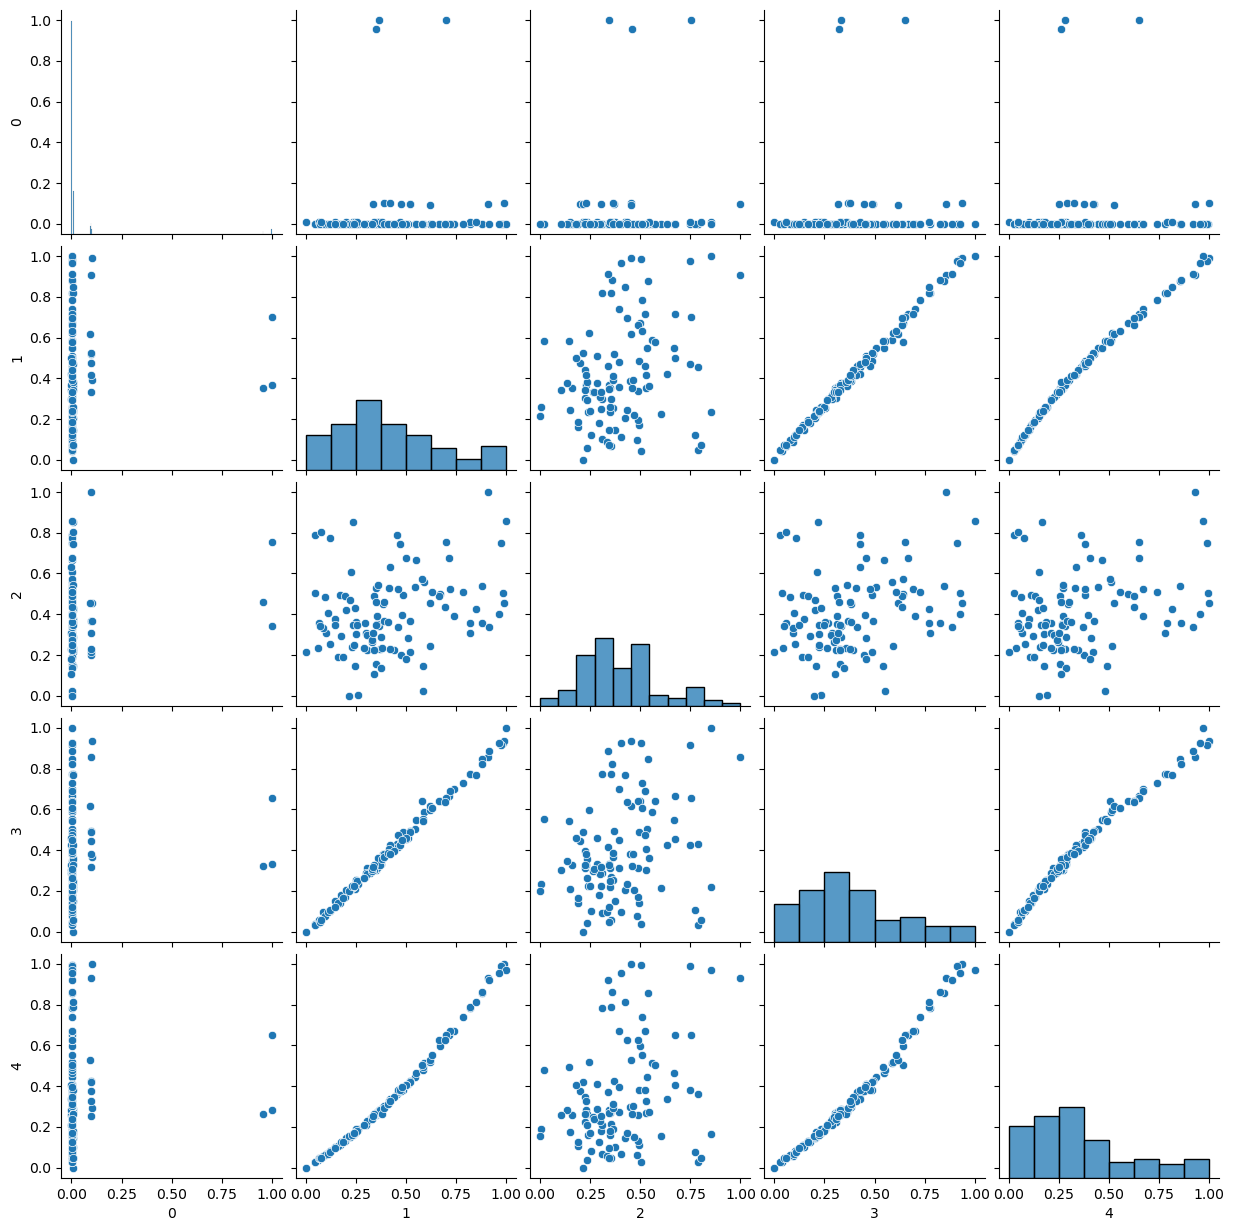

In [51]:
sns.pairplot(x_test1,vars=[0,1,2,3,4,])